In [118]:
import string
filename = 'data.txt'
with open(filename) as fobj:
    lines = fobj.readlines()
    
day_abbrs = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
jobs_in_week = [{} for day in range(7)]

for line in lines:
    if len(line) > len('\n'):
        if line.strip().upper() in day_abbrs:
            day = day_abbrs.index(line.strip().upper())
            
        else:
            job_name = ''
            job_time = 0
            
            items = line.split()
            if len(items) >= 2:
                for item in items:
                    if item.startswith(tuple(string.ascii_letters)) or\
                        item.startswith('&'):
                        job_name += item
                        job_name += ' '
                    elif item.endswith(('h', 'H')):
                        job_time += 60 * int(item[0:-1])
                    else:
                        job_time += int(item)
            
            job_name = job_name.strip()
            
#             print(day, job_name, job_time)
            jobs_in_week[day][job_name] = job_time
            
                    
        
    

In [119]:
work_times = []
sleep_times = []

def get_ave_sleep_time(jobs_in_week):
    slcnt = 0
    slsum = 0
    for day in range(7):
        if 'sl' in jobs_in_week[day]:
            slcnt += 1
            slsum += jobs_in_week[day]['sl']
    return slsum/slcnt
sl_avg = get_ave_sleep_time(jobs_in_week)

for day in range(7):
    if 'sl' not in jobs_in_week[day]:
        sleep_times.append(sl_avg)
    else:
        sleep_times.append(jobs_in_week[day]['sl'])

for day in range(7):
    working_time = 0
    for job_name in jobs_in_week[day]:
        if job_name != 'sl':
            working_time += jobs_in_week[day][job_name]
    work_times.append(working_time)    

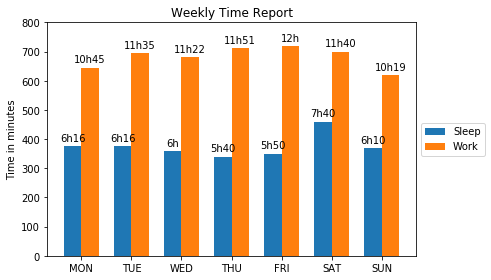

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(len(day_abbrs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sleep_times, width, label='Sleep')
rects2 = ax.bar(x + width/2, work_times, width, label='Work')

# Add some text for day_abbrs, title and custom x-axis tick day_abbrs, etc.
ax.set_ylabel('Time in minutes')
ax.set_title('Weekly Time Report')
ax.set_xticks(x)
ax.set_xticklabels(day_abbrs)
plt.yticks(np.arange(0, max(work_times)+100, 100))

ax.legend()

def get_time_string(minute):
    minute = int(minute)
    if minute >= 60:
        return str(minute//60) + 'h' + (str(minute%60) if minute%60 else '')
    else:
        return str(minute)
    
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
#                     '{}'.format(int(height)),
                    get_time_string(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom'
        )


autolabel(rects1)
autolabel(rects2)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

In [125]:
jobs_sum = {}
for jobs in jobs_in_week:
    for job in jobs:
        if job not in jobs_sum:
            jobs_sum[job] = jobs[job]
        else:
            jobs_sum[job] += jobs[job]
for job in jobs_sum:
    jobs_sum[job] = jobs_sum[job] / 60
jobs_sum = {k: v for k, v in sorted(jobs_sum.items(), key=lambda item: item[1], reverse=True)}


{'sl': 31.333333333333332,
 'osexp2': 26.433333333333334,
 'pyqt': 18.75,
 'tw': 8.616666666666667,
 'py': 6.75,
 'stone': 5.85,
 'git & github': 2.95,
 'db': 2.6666666666666665,
 'os': 2.3333333333333335,
 'wo': 2.0,
 'cc': 1.6666666666666667,
 'web dev': 0.5166666666666667,
 'log': 0.4166666666666667,
 'asm': 0.3333333333333333,
 'calli': 0.25}

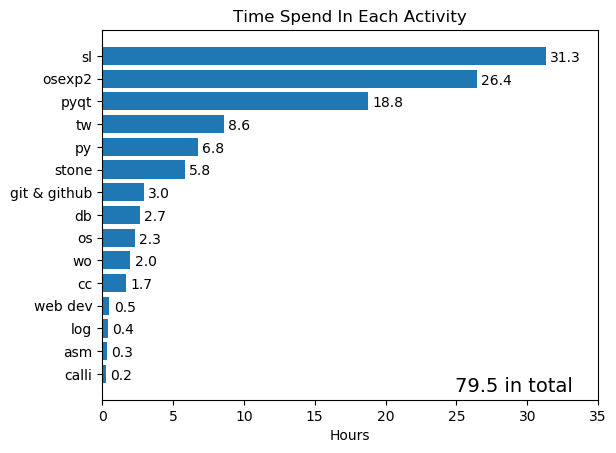

In [170]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

jobs = jobs_sum.keys()
y_pos = np.arange(len(jobs))
time = jobs_sum.values()

ax.barh(y_pos, time,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(jobs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Hours')
plt.xticks(np.arange(0, max(time)+5, 5))
ax.set_title('Time Spend In Each Activity')

for i, v in enumerate(time):
    ax.text(v + .3, i + .25, '{:.1f}'.format(v))

ax.text(0.95, 0.01, 
        '{:.1f} in total'.format(sum(jobs_sum.values()) - jobs_sum['sl']),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=14
       )
    
    
plt.show()

In [151]:
'{:.1f}'.format(3.1415999)

'3.1'